In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split    

In [2]:
df = pd.read_csv("data/fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Examining the data (General)

In [3]:
df.shape

(15420, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [6]:
df.describe(include='object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


#### Display all of the unique values for each feature

In [7]:
# Displaying the unique values in each column of the df
for column in df:
    print(column,":\n",df[column].unique())
    print("="*50,end="\n\n")

Month :
 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth :
 [5 3 2 4 1]

DayOfWeek :
 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make :
 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea :
 ['Urban' 'Rural']

DayOfWeekClaimed :
 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed :
 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

WeekOfMonthClaimed :
 [1 4 2 3 5]

Sex :
 ['Female' 'Male']

MaritalStatus :
 ['Single' 'Married' 'Widow' 'Divorced']

Age :
 [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]

Fault :
 ['Policy Holder' 'Third Party']

PolicyType :
 ['Sport - 

#### Display the features with missing values along with the % of values missing

In [8]:
# Loops through the data in the df and prints out the number of unique values in each column
for i in df.columns:
    if i != 'FraudFound_P':
        missing_values = df[i].isna().sum() + len(df[df[i]=='none']) + len(df[df[i]=='0'])
        missing_percent = round((missing_values/len(df))*100,2)
        if missing_percent > 0:
            print(f'{i}: ',end="-"*20)
            print(f'{missing_percent}%')

DayOfWeekClaimed: --------------------0.01%
MonthClaimed: --------------------0.01%
Days_Policy_Accident: --------------------0.36%
Days_Policy_Claim: --------------------0.01%
PastNumberOfClaims: --------------------28.22%
NumberOfSuppliments: --------------------45.7%


In [9]:
'''
For PastNumberOfClaims and NumberOfSuppliments: 'none' counts as a value and is important 
so we won't drop that class, but drop every other class
'''

df.drop(df[df['Days_Policy_Claim'] == 'none'].index, inplace=True)
df.drop(df[df['Days_Policy_Accident'] == 'none'].index, inplace=True)

df.drop(df[df['DayOfWeekClaimed'] == '0'].index, inplace=True)
df.drop(df[df['MonthClaimed'] == '0'].index, inplace=True)

In [10]:
'''
We will remove PolicyNumber and RepNumber since this data won't help 
with accuracy of the model's predictions
'''

df.drop(['PolicyNumber','RepNumber'],axis=1,inplace=True)

### Examining the data (Detailed)

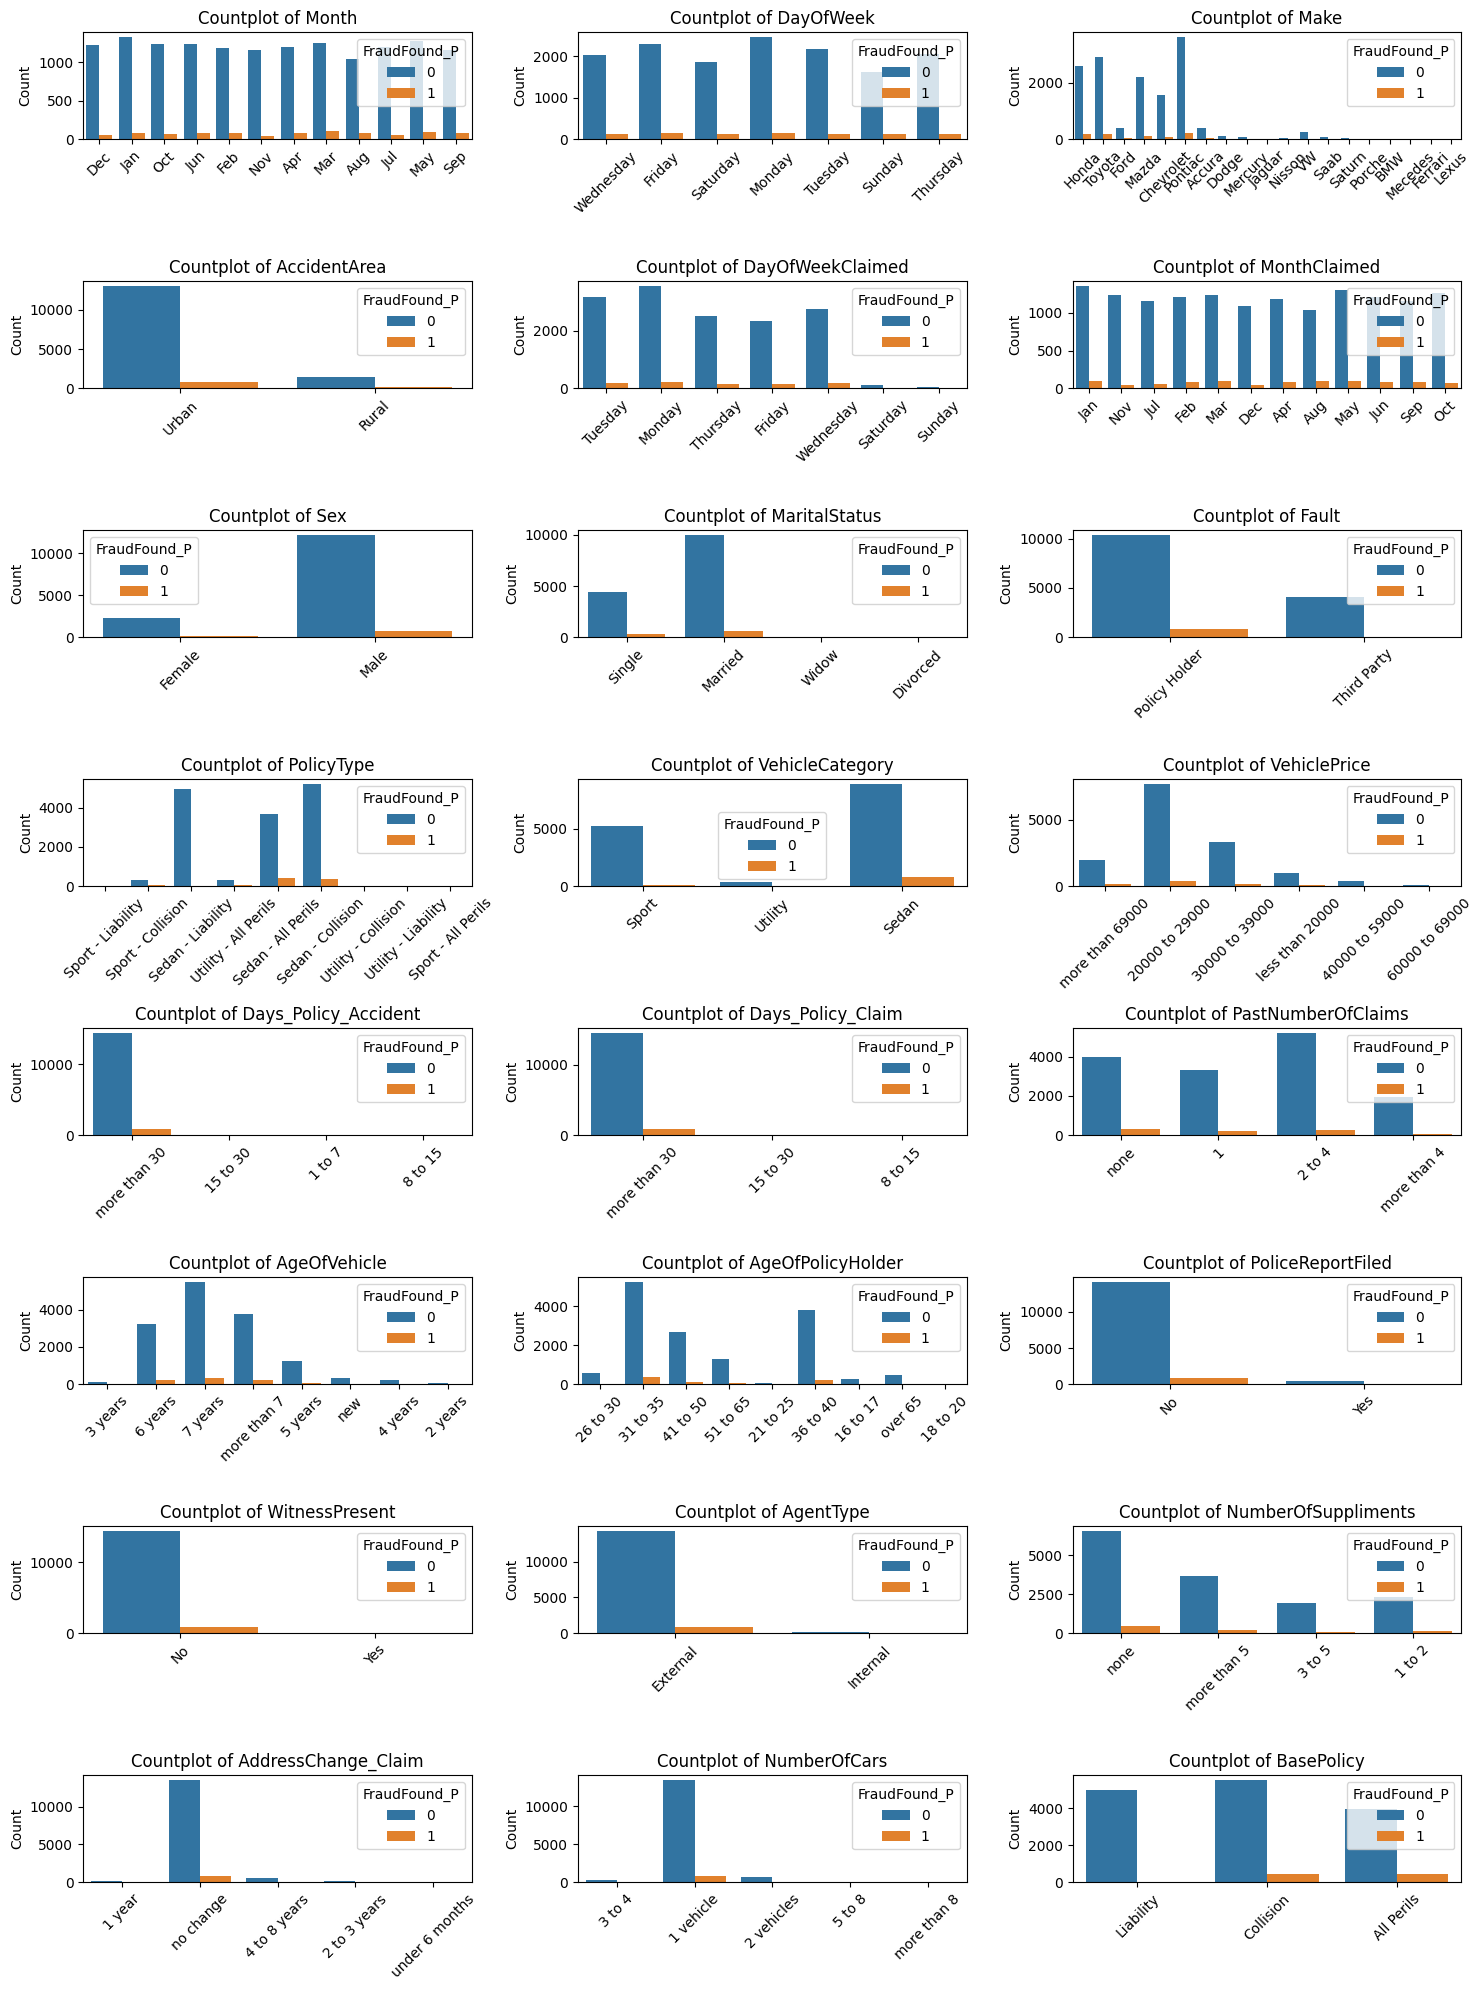

In [11]:
features = [i  for i in df.columns if df[i].dtype==object and i != 'FraudFound_P']

# Calculate the number of rows and columns for the grid
num_rows = 8
num_cols = 3

# Create subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in the subplots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=df, ax=ax,hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Hide any empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [12]:
'''
For some of the features, one category occurs much more frequently than the others.
So we will check the percentage of occurences for each category for a given feature.
'''

for i in features:
    print(round(df[i].value_counts()/len(df)*100,2))
    print("="*40)

Month
Jan    9.16
May    8.86
Mar    8.81
Jun    8.57
Oct    8.47
Dec    8.32
Apr    8.32
Feb    8.19
Jul    8.14
Sep    8.06
Nov    7.80
Aug    7.32
Name: count, dtype: float64
DayOfWeek
Monday       16.97
Friday       15.84
Tuesday      14.92
Thursday     14.09
Wednesday    14.01
Saturday     12.87
Sunday       11.30
Name: count, dtype: float64
Make
Pontiac      24.88
Toyota       20.24
Honda        18.15
Mazda        15.28
Chevrolet    10.91
Accura        3.06
Ford          2.92
VW            1.84
Dodge         0.70
Saab          0.70
Mercury       0.54
Saturn        0.38
Nisson        0.20
BMW           0.10
Jaguar        0.04
Porche        0.03
Mecedes       0.03
Ferrari       0.01
Lexus         0.01
Name: count, dtype: float64
AccidentArea
Urban    89.64
Rural    10.36
Name: count, dtype: float64
DayOfWeekClaimed
Monday       24.39
Tuesday      21.90
Wednesday    19.12
Thursday     17.25
Friday       16.19
Saturday      0.82
Sunday        0.34
Name: count, dtype: float64
MonthCla

#### Removing categories with low frequencies within features 

In [13]:
'''
We will remove categories that occur less than 7% of the time for each feaure
If there is only 1 category after removal, then the feature will be dropped 
'''

df = df.copy(deep=True)
for feature in features:
    value_percent = round(df[feature].value_counts()/len(df)*100,2)
    values_to_remove = value_percent[value_percent <= 7].index
    df = df[~df[feature].isin(values_to_remove)]
    
for feature in features:
    unique_classes = df[feature].nunique()
    if unique_classes <= 1:
        df.drop(columns=[feature], inplace=True)

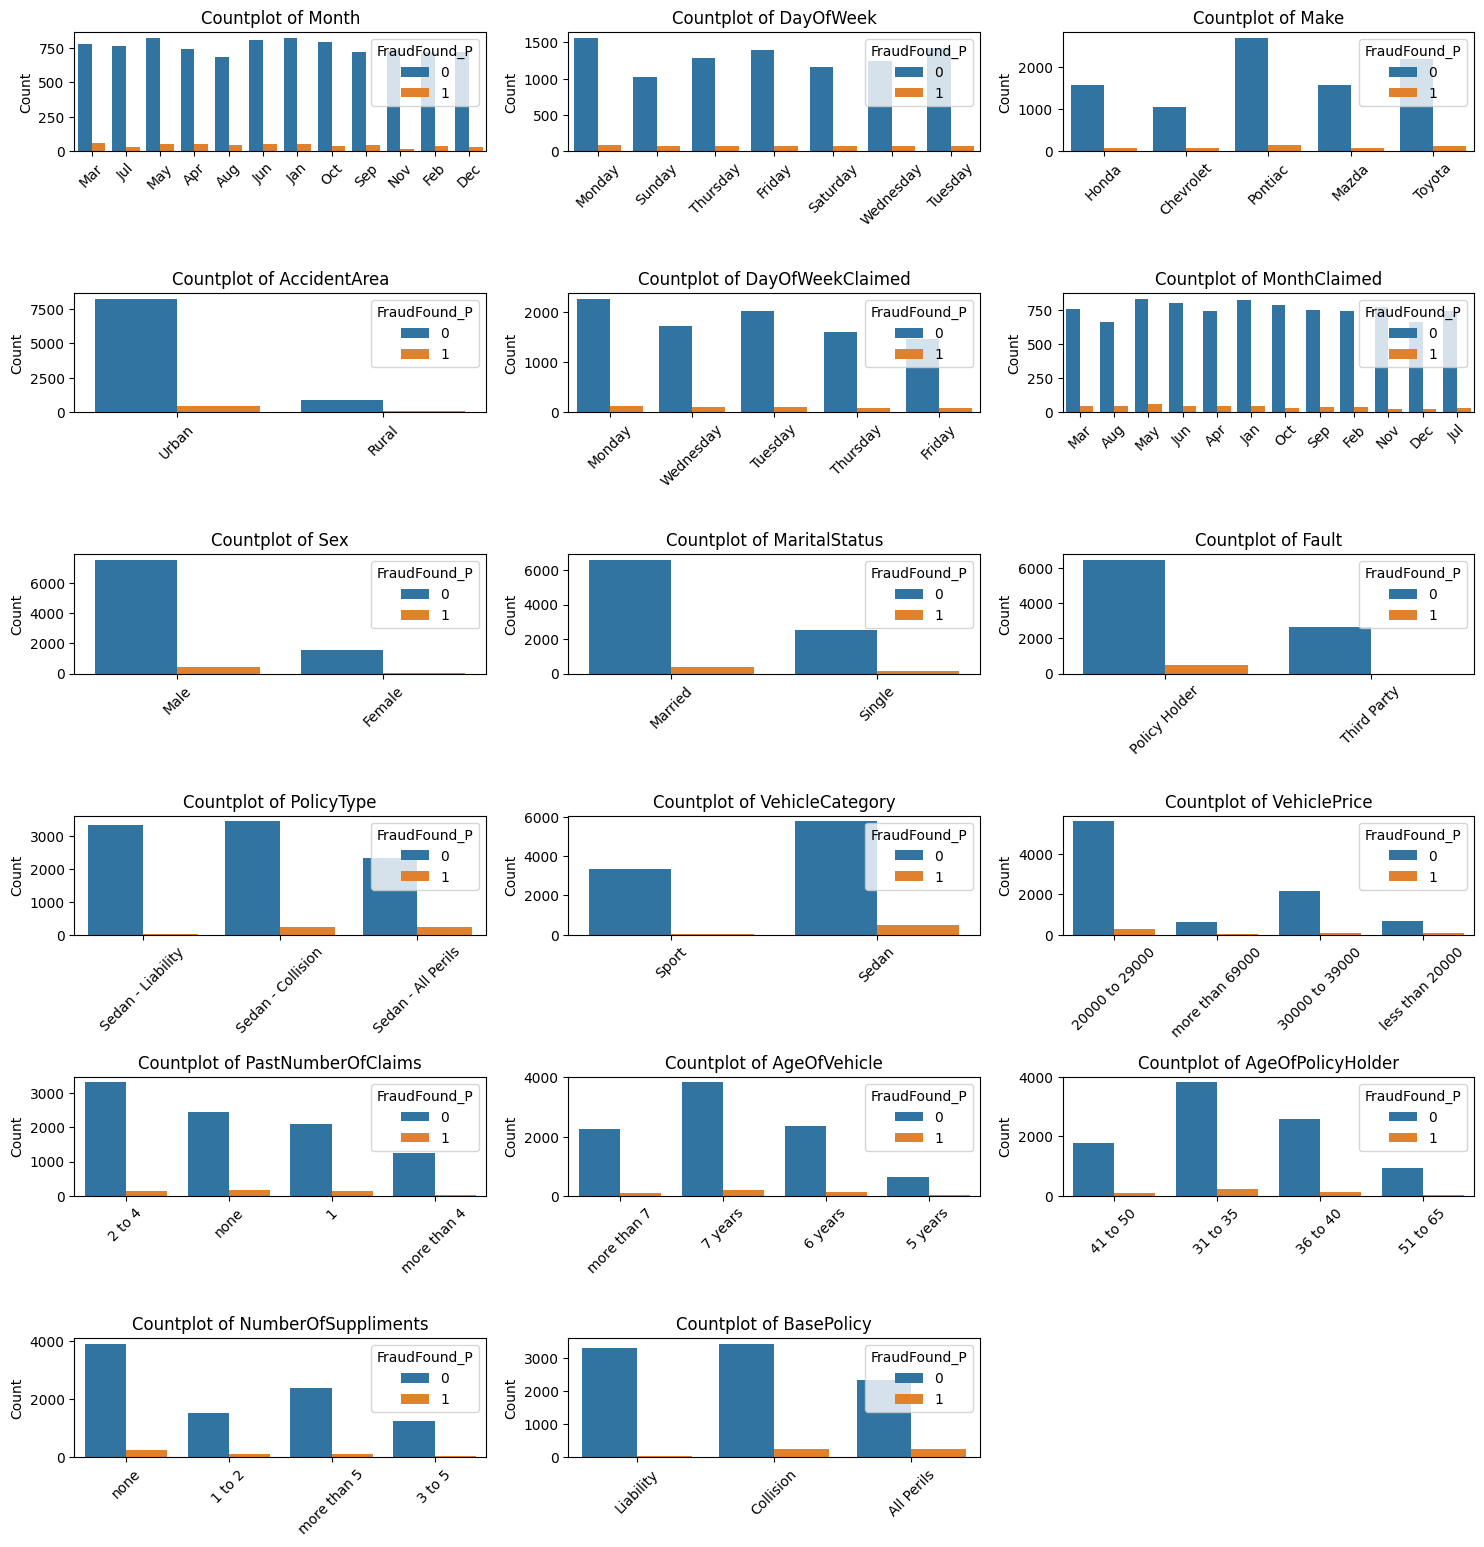

In [14]:
features = [i  for i in df.columns if df[i].dtype==object and i != 'FraudFound_P']
num_rows = 8
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in each subplot
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=df, ax=ax,hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Hide empty subplots if any
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### Feature Engineering (Applying Frequency Encoding)

In [15]:
def frequency_encoder(df):
    # Encode the binary features wihin our data
    binary_features = [i for i in df.columns if df[i].nunique() == 2]

    label_encoder = LabelEncoder()

    for feature in binary_features:
        df[feature] = label_encoder.fit_transform(df[feature])
        
    
    '''
    This code calculates and applies frequency encoding to the specified columns (months_weeks) 
    based on the occurrence of each category in the dataset for both classes of the target variable 
    (FraudFound_P = 1 and FraudFound_P = 0). The calculated frequency encoding values are then mapped 
    to the respective columns in the DataFrame. This technique can be used to encode categorical 
    features based on the relative frequencies of their categories in different target classes.

    '''

    # Perform frequency encoding here
    months_weeks_make = ['WeekOfMonth', 'Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Make']


    for column in months_weeks_make:
        # Calculate the frequency of each category for FraudFound_P=1 and FraudFound_P=0
        freq_1 = df[df['FraudFound_P'] == 1].groupby(column).size() / len(df)
        freq_0 = df[df['FraudFound_P'] == 0].groupby(column).size() / len(df)

        '''
        Calculate the frequency encoding value using the formula (15 * freq_1 + freq_0) / 2
        Within the formula 15 works best, other similar values can be used as well,
        but it really depends on the data that you're working with
        '''

        freq_encoding = (15 * freq_1 + freq_0) / 2

        # Replace the previous values with the frequency encoded values
        df[column] = df[column].map(freq_encoding)
        

    # Encoding AgeOfVehicle
    age_mapping = {
        '7 years': 2,
        '6 years': 1,
        'more than 7': 3,  
        '5 years': 0
    }

    df['AgeOfVehicle'] = df['AgeOfVehicle'].map(age_mapping)


    # Encoding PastNumberOfClaims
    claim_mapping = {
        '2 to 4': 2,
        'none': 0,
        '1': 1,
        'more than 4': 3
    }

    df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(claim_mapping)


    # Encoding AgeOfPolicyHolder
    age_mapping = {
        '31 to 35': 0,
        '36 to 40': 1,
        '41 to 50': 2,
        '51 to 65': 3
    }

    df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(age_mapping)


    # Encoding NumberOfSuppliments
    suppliments_mapping = {
        'none': 0,
        'more than 5': 3,
        '1 to 2': 1,
        '3 to 5': 2
    }

    df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(suppliments_mapping)


    # Encoding VehiclePrice
    encoding_mp = {
        '20000 to 29000': 1,
        'more than 69000': 3,
        '30000 to 39000': 2,
        'less than 20000': 0
    }
    df['VehiclePrice'] = df['VehiclePrice'].map(encoding_mp)

In [16]:
frequency_encoder(df)

### Check for High Correlation Amongst Features

<Axes: >

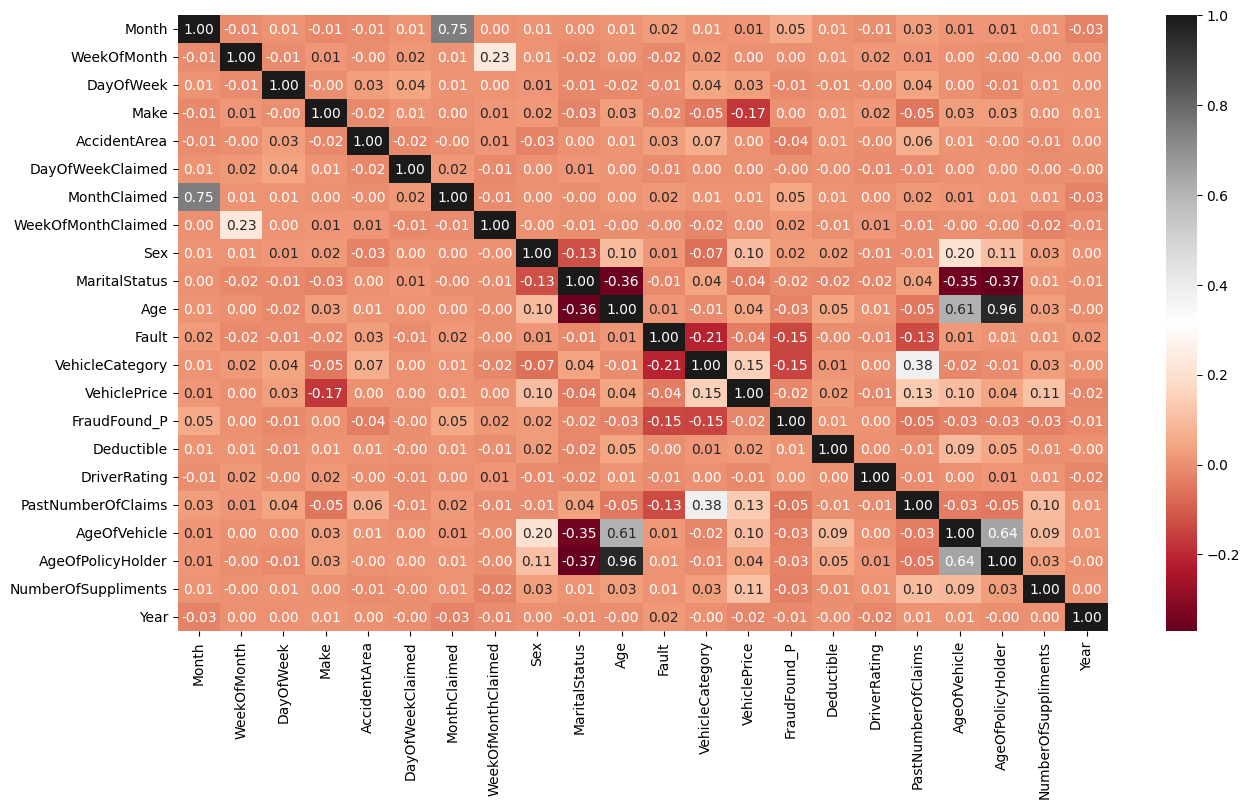

In [17]:
plt.figure(figsize=(15, 8))
# Ensure only numerical columns are displayed
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), cmap='RdGy', annot=True, fmt=".2f")

In [18]:
# Age and AgeOfPolicyHolder are highly correlated, so we will drop Age
df.drop('Age',axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation w.r.t FraudFound_P')

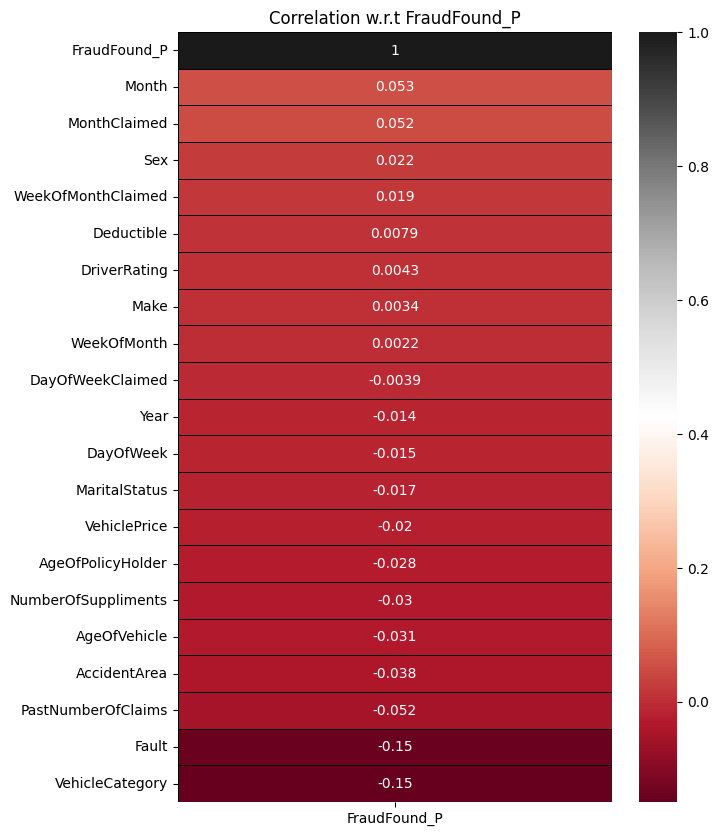

In [19]:
# Ensure to update numerical_df with the dropped column
numerical_df = df.select_dtypes(include=[np.number])

# Check correlation of features with the target variable (FraudFound_P)
corr = numerical_df.corrwith(numerical_df['FraudFound_P']).sort_values(ascending = False).to_frame()
corr.columns = ['FraudFound_P']

plt.subplots(figsize = (7,10))
sns.heatmap(corr, annot=True, cmap='RdGy', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t FraudFound_P')

#### Chi-Square Test

Text(0.5, 1.0, 'Selection of Categorical Features')

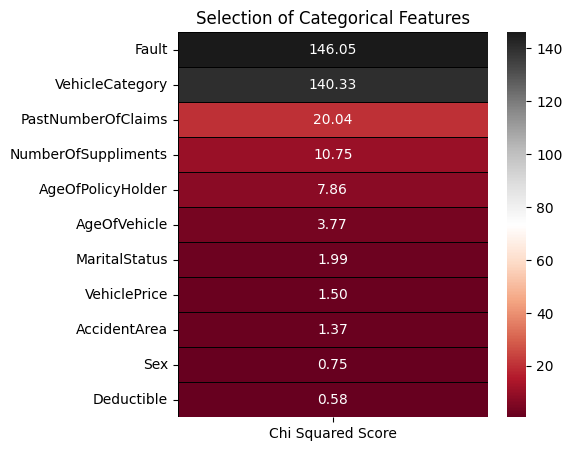

In [20]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

categorical_features = ['AgeOfPolicyHolder','VehiclePrice','AgeOfVehicle','NumberOfSuppliments','PastNumberOfClaims','AccidentArea','Sex','MaritalStatus','Fault','VehicleCategory','Deductible']
features = df.loc[:,categorical_features]
target = pd.DataFrame(df['FraudFound_P'])

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'RdGy',linewidths = 0.4,linecolor = 'black',fmt = '.2f')
plt.title('Selection of Categorical Features')

#### ANOVA Test

c:\Users\Stekunda\anaconda3\envs\DA515\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


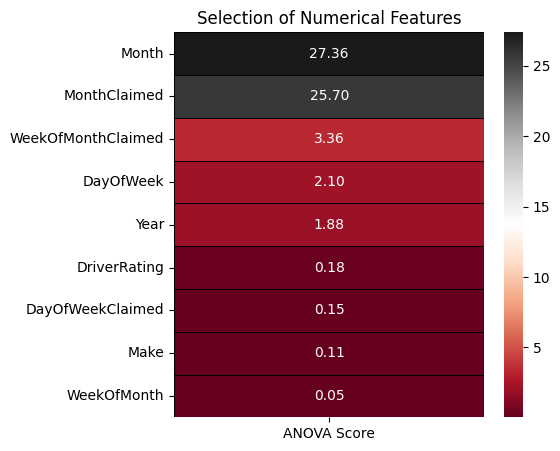

In [21]:
# Compares the means of the numerical differences between the classes of the target variable (FraudFound_P)
numerical_features = [i for i in df.columns if i not in categorical_features and i not in ['PolicyType','BasePolicy','FraudFound_P']]
features = df.loc[:,numerical_features]
target = pd.DataFrame(df['FraudFound_P'])

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'RdGy',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [22]:
'''
From the Chi-Square Test, we have decided to drop the features with scores less than 5
From the ANOVA Test, we have decided to drop the features with scores less than 1
'''

def get_final_data(df):
    df.drop(['WeekOfMonth','DayOfWeekClaimed','DriverRating','Deductible','Sex','AccidentArea','VehiclePrice','MaritalStatus','AgeOfVehicle','Make'],axis=1,inplace=True)
    
    '''
    Separate the classes of the below classes into their own features and drop the 'All Perils' class to prevent multicollinearity
    All Perils is too closely correlated to the other two classe within each feature
    '''

    df = pd.get_dummies(df,columns=['PolicyType','BasePolicy'],drop_first=True)
    return df

In [23]:
# Final dataset after preprocessing
df = get_final_data(df)

In [24]:
df.head()

,Month,DayOfWeek,MonthClaimed,WeekOfMonthClaimed,Fault,VehicleCategory,FraudFound_P,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments,Year,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,BasePolicy_Collision,BasePolicy_Liability
11,0.088346,0.145783,0.078703,0.061086,0,1,0,2,2,0,1994,False,True,False,True
17,0.063119,0.106484,0.073074,0.197019,1,0,0,0,0,1,1994,True,False,True,False
18,0.085166,0.119202,0.093558,0.061086,0,1,0,1,0,0,1994,False,True,False,True
19,0.076827,0.145783,0.093558,0.197019,1,1,0,2,0,3,1994,False,True,False,True
20,0.076827,0.130512,0.093558,0.197019,0,1,0,1,1,3,1994,False,True,False,True


In [25]:
df.shape

(9593, 15)

In [26]:
df.reset_index(inplace=True)

### Features and Labels

In [27]:
X = df.drop(['FraudFound_P'],axis=1)
y = df['FraudFound_P']

In [28]:
y.value_counts()

FraudFound_P
0    9093
1     500
Name: count, dtype: int64

### Splitting the Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [30]:
y_train.value_counts()

FraudFound_P
0    7274
1     400
Name: count, dtype: int64

In [31]:
y_test.value_counts()

FraudFound_P
0    1819
1     100
Name: count, dtype: int64

### Normalization

In [32]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

### ANN for Binary Classification

In [122]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from tqdm import tqdm

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(15, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

def train_ann(X_train, y_train, X_test, y_test, sampling_technique, class_weights=None, param_grid=None):
    # Apply SMOTE
    if sampling_technique == 'BorderlineSMOTE':
        sampling = BorderlineSMOTE(random_state=42)
        X_train, y_train = sampling.fit_resample(X_train, y_train)

    model = ANN()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters())

    # Convert to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

    # Create dataloaders
    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=32)

    # Training loop
    for epoch in range(10):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        val_accuracy = 0
        loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=True)
        for batch, (inputs, targets) in loop:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            predictions = outputs.round()  # Round to 0 or 1
            correct = (predictions == targets).sum().item()
            total = targets.numel()
            total_loss += loss.item()
            total_correct += correct
            total_samples += total

            # Validation step
            if batch % len(train_loader) == len(train_loader) - 1:
                with torch.no_grad():
                    val_correct = 0
                    val_samples = 0
                    for inputs, targets in zip(X_test, y_test):
                        inputs = inputs.unsqueeze(0)
                        targets = targets.unsqueeze(0)
                        outputs = model(inputs)
                        predictions = outputs.round()  # Round to 0 or 1
                        correct = (predictions == targets).sum().item()
                        total = targets.numel()
                        val_correct += correct
                        val_samples += total
                    val_accuracy = val_correct / val_samples

            # Update progress bar
            loop.set_description(f"Epoch [{epoch+1}/{10}]")
            loop.set_postfix(loss=total_loss/(batch+1), accuracy=total_correct/total_samples, val_accuracy=val_accuracy)

    # Calculate and print accuracy for the epoch
    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = total_correct / total_samples
    print(f'Epoch {epoch+1}: Loss = {epoch_loss}, Accuracy = {epoch_accuracy}')
    # Predict on the test set
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_classes = [1 if i > 0.7 else 0 for i in y_pred]

    cm = confusion_matrix(y_test, y_pred_classes)

    rf_Recall = round(recall_score(y_test, y_pred_classes)*100,2)
    rf_Precision = round(precision_score(y_test, y_pred_classes)*100,2)
    rf_f1 = round(f1_score(y_test, y_pred_classes)*100,2)
    rf_accuracy = round(accuracy_score(y_test, y_pred_classes)*100,2)

    metrics = [sampling_technique, rf_Recall, rf_Precision, rf_f1, rf_accuracy]

    return metrics

In [123]:
metrics = train_ann(X_train, y_train, X_test, y_test, 'BorderlineSMOTE')
print(metrics)  

C:\Users\Stekunda\AppData\Local\Temp\ipykernel_13536\1795819835.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\Stekunda\AppData\Local\Temp\ipykernel_13536\1795819835.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)
Epoch [10/10]: 100%|██████████| 455/455 [00:10<00:00, 45.20it/s, accuracy=0.898, loss=0.281, val_accuracy=0.611]

Epoch 10: Loss = 0.281315818760585, Accuracy = 0.8980615892218862
['BorderlineSMOTE', 97.0, 11.77, 21.0, 61.96]


### RNN for Binary Classification

In [145]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from tqdm import tqdm

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_prob):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = nn.Dropout(dropout_prob)
        
        self.i2h = nn.ModuleList([nn.Linear(input_size + hidden_size if i==0 else hidden_size*2, hidden_size) for i in range(num_layers)])
        self.i2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        for i in range(self.num_layers):
            combined = torch.cat((input, hidden[i]), 1) if i==0 else torch.cat((hidden[i-1], hidden[i]), 1)
            hidden[i] = self.i2h[i](combined)
            hidden[i] = self.dropout(hidden[i])
        output = self.i2o(hidden[-1])
        output = self.softmax(output)
        return output, hidden

    def initHidden(self, batch_size):
        return [torch.zeros(batch_size, self.hidden_size) for _ in range(self.num_layers)]

n_hidden = 128
n_input = 15
n_output = 2
n_layers = 2
dropout_prob = 0.5

model = RNN(n_input, n_hidden, n_output, n_layers, dropout_prob)

def train_rnn(X_train, y_train, X_test, y_test, sampling_technique, class_weights=None, param_grid=None):
    epochs = 15
    learning_rate = 0.01

    # Apply SMOTE
    if sampling_technique == 'BorderlineSMOTE':
        sampling = BorderlineSMOTE(random_state=42)
        X_train, y_train = sampling.fit_resample(X_train, y_train)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss()

    # Convert to PyTorch tensors and reshape
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long).view(-1)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.long).view(-1)

    # Create dataloaders
    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=32)

    # Training loop
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        val_accuracy = 0
        loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=True)
        for batch, (inputs, targets) in loop:
            # Initialize hidden state with the current batch size
            hidden = model.initHidden(inputs.size(0))
            
            optimizer.zero_grad()
            outputs, hidden = model(inputs, hidden)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            predictions = outputs.argmax(dim=1)
            correct = (predictions == targets).sum().item()
            total = targets.numel()
            total_loss += loss.item()
            total_correct += correct
            total_samples += total

            # Validation step
            if batch % len(train_loader) == len(train_loader) - 1:
                with torch.no_grad():
                    val_correct = 0
                    val_samples = 0
                    for inputs, targets in zip(X_test, y_test):
                        inputs = inputs.unsqueeze(0)
                        targets = targets.unsqueeze(0)
                        hidden = model.initHidden(1)
                        outputs, _ = model(inputs, hidden)
                        predictions = outputs.argmax(dim=1)
                        correct = (predictions == targets).sum().item()
                        total = targets.numel()
                        val_correct += correct
                        val_samples += total
                    val_accuracy = val_correct / val_samples

            # Update progress bar
            loop.set_description(f"Epoch [{epoch+1}/{epochs}]")
            loop.set_postfix(loss=total_loss/(batch+1), accuracy=total_correct/total_samples, val_accuracy=val_accuracy)

    # Calculate and print accuracy for the epoch
    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = total_correct / total_samples
    print(f'Epoch {epoch+1}: Loss = {epoch_loss}, Accuracy = {epoch_accuracy}')

    # Predict on the test set
    with torch.no_grad():
        hidden = model.initHidden(X_test.size(0)) 
        y_pred, _ = model(X_test, hidden)
        y_pred_classes = [1 if i.max() > 0.7 else 0 for i in y_pred]

    cm = confusion_matrix(y_test, y_pred_classes)

    rf_Recall = round(recall_score(y_test, y_pred_classes)*100,2)
    rf_Precision = round(precision_score(y_test, y_pred_classes)*100,2)
    rf_f1 = round(f1_score(y_test, y_pred_classes)*100,2)
    rf_accuracy = round(accuracy_score(y_test, y_pred_classes)*100,2)

    metrics = [sampling_technique, rf_Recall, rf_Precision, rf_f1, rf_accuracy]

    return metrics

In [146]:
metrics = train_rnn(X_train, y_train, X_test, y_test, 'BorderlineSMOTE')
print(metrics)  

C:\Users\Stekunda\AppData\Local\Temp\ipykernel_13536\3213327222.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\Stekunda\AppData\Local\Temp\ipykernel_13536\3213327222.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long).view(-1)
Epoch [15/15]: 100%|██████████| 455/455 [00:09<00:00, 47.49it/s, accuracy=0.936, loss=0.182, val_accuracy=0.341]

Epoch 15: Loss = 0.18152296119318395, Accuracy = 0.9364861149298873
['BorderlineSMOTE', 0.0, 0.0, 0.0, 94.79]



c:\Users\Stekunda\anaconda3\envs\DA515\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
